In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras import models, layers, preprocessing
from keras.datasets import imdb

max_features =7000  # size of the vocabulary
max_len = 150 # restrict the length of each loaded review to 20

Building the model

In [71]:
model = models.Sequential()

model.add(layers.Embedding(1000, 64))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 64)          64000     
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________


Loading the data

In [72]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [73]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = max_len)

##### pad_sequence:  
If sequence which is fed in is shorter than max_len, something is added.  Otherwise it is just cut off after max_len.

In [74]:
print(x_train.shape, x_test.shape)

(25000, 150) (25000, 150)


In [75]:
print(x_train[0])

[  12   16   43  530   38   76   15   13 1247    4   22   17  515   17
   12   16  626   18    2    5   62  386   12    8  316    8  106    5
    4 2223 5244   16  480   66 3785   33    4  130   12   16   38  619
    5   25  124   51   36  135   48   25 1415   33    6   22   12  215
   28   77   52    5   14  407   16   82    2    8    4  107  117 5952
   15  256    4    2    7 3766    5  723   36   71   43  530  476   26
  400  317   46    7    4    2 1029   13  104   88    4  381   15  297
   98   32 2071   56   26  141    6  194    2   18    4  226   22   21
  134  476   26  480    5  144   30 5535   18   51   36   28  224   92
   25  104    4  226   65   16   38 1334   88   12   16  283    5   16
 4472  113  103   32   15   16 5345   19  178   32]


# Data science text preprocessing in general:

- What is your vocabulary
- Sort vocabulary by number of occurences -> encode text against the vocabulary with the indices


##### The program learns how to embed words into an abstract vector representation while keeping the semantics.

In [76]:
model = models.Sequential()

model.add(layers.Embedding(
    max_features, # number of words used -> here, use the first 10000 words of your vocabulary
    8, # length of the embedding which is created by the NN
    input_length = max_len # feed 20 words into the embedding layer
))

model.add(layers.Flatten()) # turns a 20x8 matrix into a 160 vector; not throwing away any information

model.add(layers.Dense(
    1, # binary output
    activation="sigmoid" # activation function for cassification (here binary, thus sigmoid, otherwise softmax)
))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 150, 8)            56000     
_________________________________________________________________
flatten_14 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1201      
Total params: 57,201
Trainable params: 57,201
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(
    x_train, y_train, # input, output of the nn
    batch_size = 32,
    epochs=10,
    validation_split=0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.0158 - acc: 0.9969 - val_loss: 0.5409 - val_acc: 0.8508
Epoch 2/10
20000/20000 [==============================] - 1s 51us/step - loss: 0.0125 - acc: 0.9978 - val_loss: 0.5697 - val_acc: 0.8490
Epoch 3/10
20000/20000 [==============================] - 1s 51us/step - loss: 0.0098 - acc: 0.9986 - val_loss: 0.5974 - val_acc: 0.8484
Epoch 4/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.0080 - acc: 0.9987 - val_loss: 0.6262 - val_acc: 0.8460
Epoch 5/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.0064 - acc: 0.9991 - val_loss: 0.6521 - val_acc: 0.8448
Epoch 6/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.0052 - acc: 0.9992 - val_loss: 0.6795 - val_acc: 0.8428
Epoch 7/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.0043 - acc: 0.9994 - val_loss: 0.7054 - val_acc:

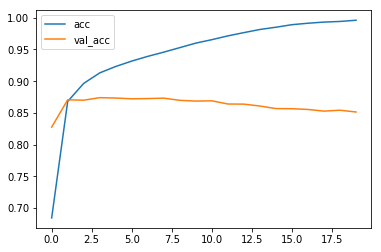

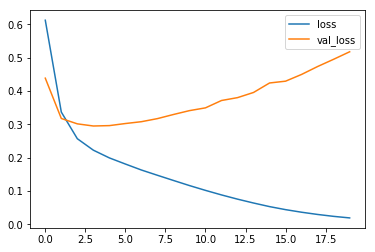

25000/25000 [==============================] - 0s 17us/step


[0.522116763226986, 0.84332]

In [78]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history) 

model.evaluate(x_test, y_test)

Quite good accuracy by taking only the first 20 words and restricting the vocabulary to 10.000 words.  

This means:  there is already some important information hidden in the first 20 words

Incerase accuracy by increasing max_len and/or max_features
